# vanZadelhoff benchmark: 1a

We run the benchmarking problems by van Zadelhoff et al (2002) using Magritte.

## 0) Setup

In [1]:
# Define Magritte folders

MagritteSetupFolder = '/home/frederik/Dropbox/Astro/Magritte/modules/setup/'
ProjectFolder       = '/home/frederik/MagritteProjects/vanZadelhoff/problem_1/'

In [2]:
# Import tools and libraries

import numpy as np

from bokeh.plotting import figure, show, gridplot
from bokeh.palettes import cividis
from bokeh.io       import output_notebook, curdoc
from bokeh.models   import Range1d
output_notebook()
#curdoc().theme = 'dark_minimal'

from glob       import glob
from sys        import path
path.insert(0, MagritteSetupFolder)

# Import from MagritteSetupFolder
from spheres  import deSphere, sphereVar, nRays
from lineData import LineData, planck, relativeDifference
from setup    import setupMagritte
from model    import mapToXD
from model    import model as Model
from build    import compile, execute

Loading BokehJS ...

## 1) Define model

Assume a spherically symmetric model described by

\begin{align}
T(r)     \ &= \ 20 \text{ K}                            \\
\rho(r)  \ &= \ \rho(r_{0}) \ \left(r/r_{0}\right)^{-2} \\
n_{i}(r) \ &= \ X_{\text{mol}} \ \rho(r)                \\
v(r)     \ &= \ 0.0 \text{ m s}^{-1}
\end{align}


In [3]:
n_H2  = 2.0E13   # [m^-3]

X_mol = 1.0E-8   # []

r_in  = 1.0E13   # [m]
r_out = 7.8E16   # [m]

T     = 20.0     # [K]

def rho (r):
    return n_H2 * np.power(r/r_in, -2.0)

In [4]:
# Setup model

model = Model (dim=1)

model.ncells = 50

base = 10
log_r_in  = np.log(r_in)  / np.log(base)
log_r_out = np.log(r_out) / np.log(base)

model.x = np.logspace (log_r_in, log_r_out, model.ncells, base=base, endpoint=True)
#model.x = np.linspace (r_in, r_out, model.ncells, endpoint=True)
model.y = [0.0 for _ in range(model.ncells)]
model.z = [0.0 for _ in range(model.ncells)]

model.density     = rho(model.x)
model.abundance   = X_mol * model.density
model.temperature = [T for _ in range(model.ncells)]
model.vturbulence = [0.0 for _ in range(model.ncells)]

model.vx = [0.0 for _ in range(model.ncells)]
model.vy = [0.0 for _ in range(model.ncells)]
model.vz = [0.0 for _ in range(model.ncells)]

# Define nsidesList for mapping to 3D model
nraysList = [int(3+2.0*np.pi*np.log(i+1)) for i in range(model.ncells)]

# Map 1D model to spherically symmetric 2D model
(model2D, cellsInShell) = mapToXD(model, dimension=2, nraysList=nraysList)
model2D.boundary = model2D.boundary + cellsInShell[0]

# Define rays
model2D.defineRays (nrays=50)

# Write new model data
model2D.writeInput (ProjectFolder + 'Magritte_files/')

# Run setup
setupMagritte (projectFolder = ProjectFolder, runName = '')

print(f'ncells in 2D model = {model2D.ncells}')
print(f'nrays  in 2D model = {model2D.nrays} ')

ncells in 2D model = 1060
nrays  in 2D model = 50 


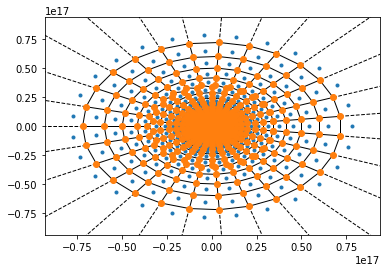

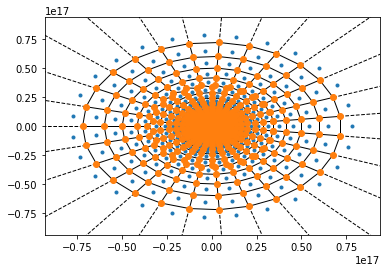

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline

points = [[model2D.x[p], model2D.y[p]] for p in range(model2D.ncells)]
vor    = Voronoi(points)

voronoi_plot_2d(vor)

### Plot model

In [6]:
# Plot model

plot_model_1 = figure (plot_width=400, plot_height=250, y_axis_type='log')
plot_model_1.circle (model.x, model.density)
plot_model_1.xaxis.axis_label = "x [m]"
plot_model_1.yaxis.axis_label = "density [m^-3]"

plot_model_2 = figure (plot_width=400, plot_height=250, y_axis_type='log')
plot_model_2.circle (model.x, model.abundance)
plot_model_2.xaxis.axis_label = "x [m]"
plot_model_2.yaxis.axis_label = "abundance [xm^-3]"

plot_model_3 = figure(plot_width=400, plot_height=250)
plot_model_3.circle (model.x, model.temperature)
plot_model_3.xaxis.axis_label = "x [m]"
plot_model_3.yaxis.axis_label = "temperature [K]"

plot_model_4 = figure(plot_width=400, plot_height=250)
plot_model_4.circle (model.x, model.vx)
plot_model_4.xaxis.axis_label = "x [m]"
plot_model_4.yaxis.axis_label = "velocity_x [m^-3]"

plot_model = gridplot ([[plot_model_1, plot_model_2],[plot_model_3, plot_model_4]])

show (plot_model)

## 2) Compile Magrittte and Run Model

In [7]:
compile (MagritteSetupFolder, ProjectFolder)
execute (MagritteSetupFolder, ProjectFolder)

-- Found OpenMP_C: -fopenmp
-- Found OpenMP_CXX: -fopenmp
-- Found OpenMP_C: -fopenmp
-- Found OpenMP_CXX: -fopenmp
-- Found OpenMP_C: -fopenmp
-- Found OpenMP_CXX: -fopenmp
-- Found OpenMP_C: -fopenmp
-- Found OpenMP_CXX: -fopenmp
-- /opt/intel/compilers_and_libraries_2017.4.196/linux/mpi/intel64/include
-- Found OpenMP_C: -fopenmp
-- Found OpenMP_CXX: -fopenmp
-- Configuring done
-- Generating done
-- Build files have been written to: /home/frederik/MagritteProjects/vanZadelhoff/problem_1/build
[  9%] Built target _HEALPix
[  9%] Built target _TEST_MAIN
[ 14%] Built target _TEST_RT_MAIN
Scanning dependencies of target _RADIATIVE_TRANSFER
[ 16%] Building CXX object src/RadiativeTransfer/src/CMakeFiles/_RADIATIVE_TRANSFER.dir/temperature.cpp.o
[ 19%] Building CXX object src/RadiativeTransfer/src/CMakeFiles/_RADIATIVE_TRANSFER.dir/frequencies.cpp.o
[ 21%] Building CXX object src/RadiativeTransfer/src/CMakeFiles/_RADIATIVE_TRANSFER.dir/lines.cpp.o
[ 23%] Building CXX object src/Radiative

## 3) Get Magritte output

In [8]:
# Read Magritte output

ioFolders = glob(ProjectFolder + 'io/*/')
ioFolders.sort()

inputFolders  = [folder +  'input/' for folder in ioFolders]
outputFolders = [folder + 'output/' for folder in ioFolders]

lastOutput = outputFolders[-1]
lastInput  =  inputFolders[-1]

pops_files = glob(lastOutput + 'populations_0*.txt')
Jeff_files = glob(lastOutput + 'Jeff_0*.txt')
J_files    = glob(lastOutput + 'J_*.txt')
G_files    = glob(lastOutput + 'G_*.txt')
nu_files   = glob(lastOutput + 'frequencies_nu*.txt')
lnr_files  = glob(lastOutput + 'frequencies_line_nr*.txt')
eta_files  = glob(lastOutput + 'eta_0*.txt')
chi_files  = glob(lastOutput + 'chi_0*.txt')

pops_files.sort()
Jeff_files.sort()
eta_files.sort()
chi_files.sort()

pops_2D_data = [np.loadtxt(fileName) for fileName in pops_files]
Jeff_2D_data = [np.loadtxt(fileName) for fileName in Jeff_files]
J_2D_data    = [np.loadtxt(fileName) for fileName in J_files]
G_2D_data    = [np.loadtxt(fileName) for fileName in G_files]
nu_2D_data   = [np.loadtxt(fileName) for fileName in nu_files]
lnr_2D_data  = [np.loadtxt(fileName) for fileName in lnr_files]
eta_2D_data  = [np.loadtxt(fileName) for fileName in eta_files]
chi_2D_data  = [np.loadtxt(fileName) for fileName in chi_files]

# Import linedata
lineData = LineData (ProjectFolder + '/Magritte_files/linedata/test.txt')

### Map sphere to 1D model

In [9]:
# Map shpere to 1D model

#pops_data = deSphere(cellsInShell, pops_2D_data)
#pops_var  = sphereVar(cellsInShell, pops_2D_data)

#J_data = deSphere(cellsInShell, J_2D_data)
#J_var  = sphereVar(cellsInShell, J_2D_data)

#G_data = deSphere(cellsInShell, G_2D_data)
#G_var  = sphereVar(cellsInShell, G_2D_data)

#Jeff_data = deSphere(cellsInShell, Jeff_2D_data)
#Jeff_var  = sphereVar(cellsInShell, Jeff_2D_data)

#nu_data = deSphere(cellsInShell, nu_2D_data)
#nu_var  = sphereVar(cellsInShell, nu_2D_data)

#lnr_data = deSphere(cellsInShell, lnr_2D_data)
#lnr_var  = sphereVar(cellsInShell, lnr_2D_data)

#etaR   = deSphere(cellsInShell, eta_data)
#etaVar = sphereVar(cellsInShell, eta_data)

#chiR   = deSphere(cellsInShell, chi_data)
#chiVar = sphereVar(cellsInShell, chi_data)

#for s in range(model.ncells):
    #print(f'pops_var  = {np.max(pops_var[0][s])}')
    #print(f'Jeff_var  = {np.max(Jeff_var[0][s])}')
    #print(f'J_var     = {np.max(J_var[0][s])}')
    #print(f'nu_var    = {np.max(nu_var[0][s])}')
    #print(f'lnr_var   = {np.max(lnr_var[0][s])}')

#print(np.max(etaVar))
#print(np.max(chiVar))

In [10]:
# Load Ratran results

data_ratran = np.loadtxt('/home/frederik/Codes/Ratran_copy/FrederiksExapmle/output/vanZadelhoff_problem_1a.pop', skiprows=14)
x_ratran    = data_ratran[:,1]*1.0E-2
pops_ratran = data_ratran[:,9:]


x,y,z, H2, T, abn, conv, p0, p1 = np.loadtxt('/home/frederik/Dropbox/Astro/Ward/vanZadelhoff/populations_1a_turb_therm.pop',skiprows=1, unpack=True)

r = np.sqrt(x*x + y*y + z*z)

In [11]:
x_ratran

array([1.000000e+13, 1.431145e+13, 2.048177e+13, 2.931240e+13,
       4.195031e+13, 6.003699e+13, 8.592167e+13, 1.229664e+14,
       1.759828e+14, 2.518570e+14, 3.604440e+14, 5.158479e+14,
       7.382533e+14, 1.056548e+15, 1.512074e+15, 2.163998e+15,
       3.096995e+15, 4.432251e+15, 6.343196e+15, 9.078036e+15,
       1.299199e+16, 1.859343e+16, 2.660990e+16, 3.808264e+16,
       5.450180e+16])

### Plot output

In [12]:
# Plot functions

def color(s):
    ns = int((s_max-s_min) / s_step + 1)
    es = int((s    -s_min) / s_step)
    return cividis(ns)[es]

def legend(s):
    return f'{s}'

def bokeh_log_plot(title, x, y, xlabel, ylabel):
    return

In [13]:
s_min  = 0
s_max  = model.ncells
s_step = 1

In [14]:
outNr = -1

In [15]:
# Level populations

plot = figure (title='Level populations', width=600, height=600, x_axis_type='log', y_axis_type='log')
x  = np.sqrt(np.power(model2D.x, 2) + np.power(model2D.y,2))
y1 = pops_2D_data[outNr][:,0]/model2D.abundance
y2 = pops_2D_data[outNr][:,1]/model2D.abundance
#plot.circle (x, y1, color='red',  legend='lower level')
plot.circle (x, y2, color='blue', legend='Magritte')
#plot.circle (x_ratran, pops_ratran[:,0], color='yellow')
plot.circle (x_ratran, pops_ratran[:,1], color='red', legend='Ratran')
#plot.circle (r, p0, color='white')
#plot.circle (r, p1, color='white')
plot.xaxis.axis_label = "r [m]"
plot.yaxis.axis_label = "population"
plot.legend.location = "center_right"
plot.y_range = Range1d(0.1, 1.0)
plot.x_range = Range1d(1.0E13, 1.0E17)
show (plot)

In [16]:
# Mean intensity

plot = figure (title='Mean intensity', width=700, height=400, y_axis_type='log', x_axis_type='log')
x  = np.sqrt(np.power(model2D.x, 2) + np.power(model2D.y,2))
y1 = Jeff_2D_data[-1][:]
plot.circle (x, y1, color='yellow')
plot.xaxis.axis_label = "r [m]"
plot.yaxis.axis_label = "mean intensity [W m^-2]"
show (plot)

In [17]:
# Spectrum

plot = figure (title='Spectrum', width=700, height=500, y_axis_type='log')
for s in range(s_min, s_max, s_step):
    x = nu_2D_data[outNr][s]
    y =  J_2D_data[outNr][s]
    plot.line(x, y, color=color(s), legend=legend(s))
plot.xaxis.axis_label = "frequencies [Hz]"
plot.yaxis.axis_label = "Mean intensity [W/m^2]"
show(plot)

In [17]:
# Flux (G) spectrum

plot = figure (title='Spectrum', width=700, height=500)
for s in range(s_min, s_max, s_step):
    x = nu_2D_data[outNr][s]
    y =  G_2D_data[outNr][s]
    plot.line(x, y, color=color(s), legend=legend(s))
plot.xaxis.axis_label = "frequencies [Hz]"
plot.yaxis.axis_label = "Mean intensity [W/m^2]"
show(plot)

In [18]:
line = 0

In [19]:
# Line

plot = figure (title='Line model', width=400, height=400, y_axis_type="log")
for s in range (s_min, s_max, s_step):
    x = nu_2D_data[0][s]
    y =  J_2D_data[0][s]
    plot.circle (x, y, color=color(s), legend=legend(s))
    
show (plot)